In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("framingham.csv")
display(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Preprocessing Data

In [3]:
# "education" showed -ve correlation, with target label
# "male" was shown to be IN SIGNIFICANT, during T TEst(based on p-value)
# "diabetes" was shown to be IN SIGNIFICANT, during T TEst(based on p-value)
# "currentSmoker" fails in chi-square test
df=df.drop(axis=1,labels=["male","education","diabetes","currentSmoker"])
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,NaN,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
#To understand , which attribute has how many ("NULL" or NaN) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4238 non-null   int64  
 1   cigsPerDay          4209 non-null   float64
 2   BPMeds              4185 non-null   float64
 3   prevalentStroke     4238 non-null   int64  
 4   prevalentHyp        4238 non-null   int64  
 5   totChol             4188 non-null   float64
 6   sysBP               4238 non-null   float64
 7   diaBP               4238 non-null   float64
 8   BMI                 4219 non-null   float64
 9   heartRate           4237 non-null   float64
 10  glucose             3850 non-null   float64
 11  POSSIBILITY OF CVD  4238 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 397.4 KB


In [5]:
# each column has 4238 entries.
# for attribute "glucose" , there are only 3850 "not-NULL" entries



In [6]:
# for categorical attributes, we replace Nan with most frequent attribute
#for continous attributes,we replace Nan with mean .

#for continous attributes--->replace Nan with mean
df["cigsPerDay"]=df["cigsPerDay"].fillna(round(df["cigsPerDay"].mean()))
df["totChol"]=df["totChol"].fillna(round(df["totChol"].mean()))
df["BMI"]=df["BMI"].fillna(round(df["BMI"].mean(),2))
df["heartRate"]=df["heartRate"].fillna(round(df["heartRate"].mean()))
df["glucose"]=df["glucose"].fillna(round(df["glucose"].mean()))


#for categorical attributes-->replace Nan with most freq value
vall,freqq=np.unique(df["BPMeds"],return_counts=True)
#display(vall,freqq)
df["BPMeds"]=df["BPMeds"].fillna(vall[freqq.argmax()])

display(df)



,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,0.0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4238 non-null   int64  
 1   cigsPerDay          4238 non-null   float64
 2   BPMeds              4238 non-null   float64
 3   prevalentStroke     4238 non-null   int64  
 4   prevalentHyp        4238 non-null   int64  
 5   totChol             4238 non-null   float64
 6   sysBP               4238 non-null   float64
 7   diaBP               4238 non-null   float64
 8   BMI                 4238 non-null   float64
 9   heartRate           4238 non-null   float64
 10  glucose             4238 non-null   float64
 11  POSSIBILITY OF CVD  4238 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 397.4 KB


In [8]:
#now all attributes, has all 4238 values present

### step 0: Preparing Data

In [9]:
# random shuffling of data
#df=df.sample(frac=1)
#display(df)

#not doing this step, as data is already shuffled, as per dataset discription

In [14]:
# taking data , from the DataFrame object, to numpy object
data=df.values
print(data)
print(data.shape)
print(type(data))

[[ 39.   0.   0. ...  80.  77.   0.]
 [ 46.   0.   0. ...  95.  76.   0.]
 [ 48.  20.   0. ...  75.  70.   0.]
 ...
 [ 48.  20.   0. ...  84.  86.   0.]
 [ 44.  15.   0. ...  86.  82.   0.]
 [ 52.   0.   0. ...  80. 107.   0.]]
(4238, 12)
<class 'numpy.ndarray'>


In [15]:
#separating target label, from rest of the attributes
X=data[:,:-1]  
Y=data[:,-1]  # target label
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[ 39.     0.     0.   ...  26.97  80.    77.  ]
 [ 46.     0.     0.   ...  28.73  95.    76.  ]
 [ 48.    20.     0.   ...  25.34  75.    70.  ]
 ...
 [ 48.    20.     0.   ...  22.    84.    86.  ]
 [ 44.    15.     0.   ...  19.16  86.    82.  ]
 [ 52.     0.     0.   ...  21.47  80.   107.  ]]
(4238, 11)
[0. 0. 0. ... 0. 0. 0.]
(4238,)


### step 1: spliting training and testng data

In [16]:
#performing split , to train,test data
split=0.7*X.shape[0]
print(split)
split=int(split)
print("split length:",split)
print()

X_train= X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

2966.6
split length: 2966

X_train: (2966, 11)
X_test: (1272, 11)
Y_train: (2966,)
Y_test: (1272,)


# step 2: Implementation of Adaboost

## weak classifier= stums(Decision Tree of depth=1)

## bosting technique=adaptive boosting

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [18]:
abc=AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=1),
    n_estimators=96,
    learning_rate=1.2,
    random_state=96)

In [19]:
abc

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1.2, n_estimators=96, random_state=96)

In [20]:
abc.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1.2, n_estimators=96, random_state=96)

In [21]:
abc.score(X_train,Y_train)

0.8634524612272421

### step 3 :testing on test set

In [23]:
abc.score(X_test,Y_test)

0.8364779874213837

### step 4: Hyper Parameter Tuning

In [37]:
testing_acc=[]
for i in range(60,500):
    abc1=AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=1),
    n_estimators=i,
    learning_rate=1.2,
    random_state=96)
    
    abc1.fit(X_train,Y_train)
    
    testing_acc.append(abc1.score(X_test,Y_test))
    
    
    

In [31]:
import matplotlib.pyplot as plt

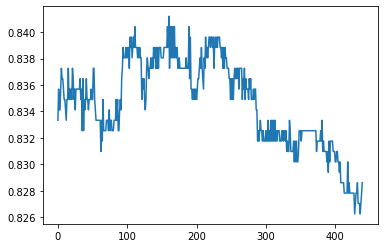

In [38]:
plt.plot(testing_acc)


In [39]:
testing_acc=np.array(testing_acc)
index=testing_acc.argmax()
index

160

In [40]:
print("max possible accuracy=",testing_acc[160]*100," %")

max possible accuracy= 84.11949685534591  %


### step 5: evaluate performance using various parameters

In [24]:
Y_pred=abc.predict(X_test)


In [25]:
def evaluateParameters(Y_pred,Y_test):
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(Y_test)):
        actual=Y_test[i]
        if(actual==1):
            if(actual==Y_pred[i]):
                tp+=1
            else:
                fn+=1
        else:
            if(actual==Y_pred[i]):
                tn+=1
            else:
                fp+=1
    print("\naccuracy= ",(tp+tn)/(tp+tn+fn+fp))
    print("\nsensitivity= ",tp/(tp+fn))
    print("\nspecificity= ",tn/(fp+tn))
    print("\nPPv= ",tp/(tp+fp))
    print("\nNPV= ",tn/(tn+fn))
    
            
            

In [26]:
evaluateParameters(Y_pred,Y_test)



accuracy=  0.8364779874213837

sensitivity=  0.1111111111111111

specificity=  0.9630655586334257

PPv=  0.3442622950819672

NPV=  0.861271676300578


# saving trained model, for deploying on web

In [27]:
import pickle

In [28]:
with open('ab_model.pkl','wb') as f:
    pickle.dump(abc,f)